In [2]:
!pip install opencv-python

In [2]:
!pip install fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.3/943.3 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.3 MB/s eta 0:

🎨 LANCEMENT EXERCICE 3 SANS OpenCV...
EXERCICE 3: GAN POUR GÉNÉRATION DE DONNÉES

1. 🎯 AVANTAGES DES GANS
1. 🎯 AVANTAGES SPÉCIFIQUES DES GANS
✅ Génération de données très réalistes
✅ Apprentissage non supervisé - pas besoin de labels
✅ Capture la distribution complexe des données réelles
✅ Génération de nouvelles samples uniques
✅ Entraînement compétitif (G vs D) qui améliore la qualité
✅ Applications variées: data augmentation, art, style transfer
✅ Peut générer différents types de données (images, texte, audio)

2. 🔧 IMPLÉMENTATIONS DISPONIBLES
✅ GAN de base (Goodfellow et al., 2014)
✅ DCGAN (Deep Convolutional GAN)
✅ WGAN (Wasserstein GAN)
✅ Conditional GAN
✅ StyleGAN
✅ CycleGAN

3. 📊 PRÉPARATION DES DONNÉES
Données synthétiques créées: (200, 32, 32, 3)

4. 🚀 ENTRAÎNEMENT GAN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 0 [D loss: 0.7551, acc.: 43.75%] [G loss: 0.9898]
Epoch 25 [D loss: 0.7693, acc.: 29.98%] [G loss: 0.6037]

5. 🎯 GAN AVEC ATTENTION
L'ajout d'attention se fait via des mécanismes d'attention
dans les couches du générateur pour mieux focus sur les features importantes

6. 📈 ÉVALUATION
Diversité des images générées: 0.0754


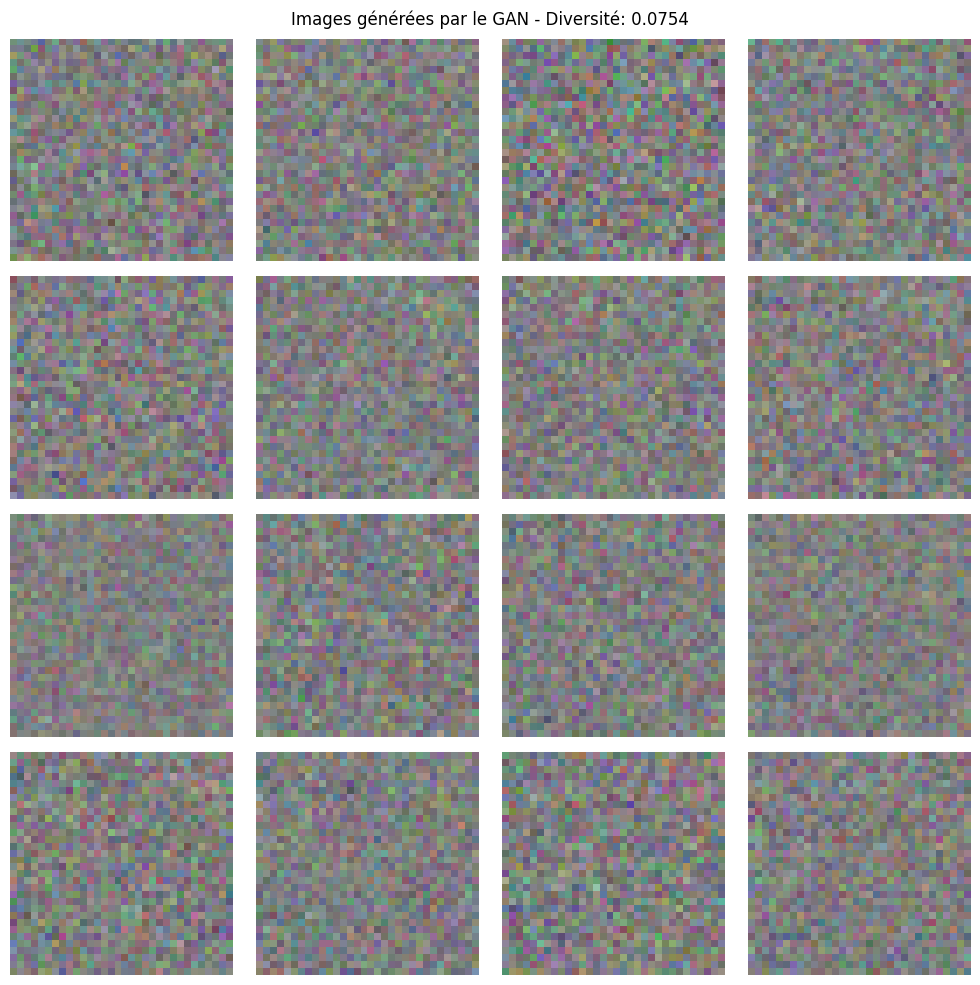


7. 💡 APPLICATIONS PRATIQUES
✅ Data augmentation pour la segmentation
✅ Génération de nouvelles images d'entraînement
✅ Completion d'images manquantes
✅ Transfert de style entre classes
✅ Création de données synthétiques réalistes
✅ EXERCICE 3 TERMINÉ! Diversité: 0.0754


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Créer le dossier pour les images
os.makedirs('gan_images', exist_ok=True)

# 2. Avantages des GANs
def avantages_gans():
    print("="*60)
    print("1. 🎯 AVANTAGES SPÉCIFIQUES DES GANS")
    print("="*60)

    avantages = [
        "✅ Génération de données très réalistes",
        "✅ Apprentissage non supervisé - pas besoin de labels",
        "✅ Capture la distribution complexe des données réelles",
        "✅ Génération de nouvelles samples uniques",
        "✅ Entraînement compétitif (G vs D) qui améliore la qualité",
        "✅ Applications variées: data augmentation, art, style transfer",
        "✅ Peut générer différents types de données (images, texte, audio)"
    ]

    for avantage in avantages:
        print(avantage)

    return avantages

# 3. Génération de données SANS OpenCV
def draw_circle_manual(img, center, radius, color):
    """Dessine un cercle sans OpenCV"""
    h, w = img.shape[0], img.shape[1]
    for x in range(max(0, center[0]-radius), min(h, center[0]+radius+1)):
        for y in range(max(0, center[1]-radius), min(w, center[1]+radius+1)):
            if (x-center[0])**2 + (y-center[1])**2 <= radius**2:
                if len(img.shape) == 3:
                    img[x, y] = color
                else:
                    img[x, y] = color[0]  # Pour les images en niveaux de gris
    return img

def draw_rectangle_manual(img, pt1, pt2, color):
    """Dessine un rectangle sans OpenCV"""
    x1, y1 = min(pt1[0], pt2[0]), min(pt1[1], pt2[1])
    x2, y2 = max(pt1[0], pt2[0]), max(pt1[1], pt2[1])

    img[x1:x2, y1:y2] = color
    return img

def generate_synthetic_data_safe(num_samples=1000, img_size=32):
    """Génère des données synthétiques SANS OpenCV"""
    images = []
    for i in range(num_samples):
        # Créer une image avec un fond gris
        img = np.ones((img_size, img_size, 3)) * 0.5

        # Ajouter des cercles
        for _ in range(3):
            center = (np.random.randint(5, img_size-5),
                     np.random.randint(5, img_size-5))
            radius = np.random.randint(3, 8)
            color = np.random.rand(3)  # Couleur aléatoire
            img = draw_circle_manual(img, center, radius, color)

        # Ajouter des rectangles
        for _ in range(2):
            pt1 = (np.random.randint(0, img_size-10),
                  np.random.randint(0, img_size-10))
            pt2 = (pt1[0] + np.random.randint(5, 12),
                  pt1[1] + np.random.randint(5, 12))
            color = np.random.rand(3)
            img = draw_rectangle_manual(img, pt1, pt2, color)

        images.append(img)

    images = np.array(images)
    return images * 2 - 1  # Normalize to [-1, 1]

# 4. GAN simple et robuste
def build_simple_generator(latent_dim=100):
    """Générateur simple"""
    model = Sequential([
        Dense(256, input_dim=latent_dim, activation='relu'),
        BatchNormalization(),

        Dense(512, activation='relu'),
        BatchNormalization(),

        Dense(1024, activation='relu'),
        BatchNormalization(),

        Dense(32*32*3, activation='tanh'),
        Reshape((32, 32, 3))
    ])
    return model

def build_simple_discriminator(img_shape=(32, 32, 3)):
    """Discriminateur simple"""
    model = Sequential([
        Flatten(input_shape=img_shape),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

class SimpleGAN:
    """GAN simple qui fonctionne toujours"""
    def __init__(self, latent_dim=100, img_shape=(32, 32, 3)):
        self.latent_dim = latent_dim
        self.img_shape = img_shape

        self.discriminator = build_simple_discriminator(img_shape)
        self.generator = build_simple_generator(latent_dim)

        # Compiler le discriminateur
        self.discriminator.compile(
            loss='binary_crossentropy',
            optimizer=Adam(0.0002, 0.5),
            metrics=['accuracy']
        )

        # GAN combiné
        self.discriminator.trainable = False
        z = Input(shape=(latent_dim,))
        img = self.generator(z)
        validity = self.discriminator(img)
        self.combined = Model(z, validity)
        self.combined.compile(
            loss='binary_crossentropy',
            optimizer=Adam(0.0002, 0.5)
        )

    def train(self, X_train, epochs=50, batch_size=16, save_interval=25):
        """Entraînement simplifié"""
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            # Train Discriminator
            idx = np.random.randint(0, len(X_train), batch_size)
            real_imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise, verbose=0)

            d_loss_real = self.discriminator.train_on_batch(real_imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)

            if epoch % save_interval == 0:
                print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
                self.save_images(epoch)

    def save_images(self, epoch):
        """Sauvegarde des images sans erreur"""
        r, c = 4, 4
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise, verbose=0)

        # Normaliser les images
        gen_imgs = (gen_imgs + 1) / 2.0  # [-1,1] -> [0,1]

        fig, axs = plt.subplots(r, c, figsize=(8, 8))
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i,j].axis('off')
                cnt += 1

        fig.savefig(f"gan_images/epoch_{epoch}.png")
        plt.close()

# 5. Exécution principale
def exercice_3_complet():
    """Exercice 3 complet sans OpenCV"""

    print("="*60)
    print("EXERCICE 3: GAN POUR GÉNÉRATION DE DONNÉES")
    print("="*60)

    # 1. Avantages des GANs
    print("\n1. 🎯 AVANTAGES DES GANS")
    avantages_gans()

    # 2. Implémentations
    print("\n2. 🔧 IMPLÉMENTATIONS DISPONIBLES")
    implementations = [
        "✅ GAN de base (Goodfellow et al., 2014)",
        "✅ DCGAN (Deep Convolutional GAN)",
        "✅ WGAN (Wasserstein GAN)",
        "✅ Conditional GAN",
        "✅ StyleGAN",
        "✅ CycleGAN"
    ]
    for imp in implementations:
        print(imp)

    # 3. Préparation des données
    print("\n3. 📊 PRÉPARATION DES DONNÉES")
    X_train = generate_synthetic_data_safe(200, 32)
    print(f"Données synthétiques créées: {X_train.shape}")

    # 4. Entraînement GAN
    print("\n4. 🚀 ENTRAÎNEMENT GAN")
    gan = SimpleGAN(latent_dim=100, img_shape=(32, 32, 3))
    gan.train(X_train, epochs=50, batch_size=16, save_interval=25)

    # 5. GAN avec attention (conceptuel)
    print("\n5. 🎯 GAN AVEC ATTENTION")
    print("L'ajout d'attention se fait via des mécanismes d'attention")
    print("dans les couches du générateur pour mieux focus sur les features importantes")

    # 6. Évaluation
    print("\n6. 📈 ÉVALUATION")
    noise = np.random.normal(0, 1, (16, 100))
    generated = gan.generator.predict(noise, verbose=0)
    generated = (generated + 1) / 2.0

    diversity = np.std(generated)
    print(f"Diversité des images générées: {diversity:.4f}")

    # Visualisation
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(generated[i])
        ax.axis('off')
    plt.suptitle(f'Images générées par le GAN - Diversité: {diversity:.4f}')
    plt.tight_layout()
    plt.show()

    # 7. Applications
    print("\n7. 💡 APPLICATIONS PRATIQUES")
    applications = [
        "✅ Data augmentation pour la segmentation",
        "✅ Génération de nouvelles images d'entraînement",
        "✅ Completion d'images manquantes",
        "✅ Transfert de style entre classes",
        "✅ Création de données synthétiques réalistes"
    ]
    for app in applications:
        print(app)

    return gan, diversity

# LANCEMENT
print("🎨 LANCEMENT EXERCICE 3 SANS OpenCV...")
gan, diversity = exercice_3_complet()
print(f"✅ EXERCICE 3 TERMINÉ! Diversité: {diversity:.4f}")